<a href="https://colab.research.google.com/github/fkvl0327/deepLearning/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EB%94%A5%EB%9F%AC%EB%8B%9D_1%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 퍼셉트론

## 2.1 퍼셉트론이란?

- 다수의 신호를 받아 하나의 신호를 출력

## 2.2 단순한 논리회로

### 2.2.1 AND 게이트

- x1과 x2 모두가 1일 때만 가중 신호의 총합이 주어진 임계값을 웃돈다.

### 2.2.2 NAND 게이트와 OR 게이트

- NAND = Not AND

> AND 게이트의 출력을 뒤집은 것

> x1과 x2 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력

- OR 게이트: 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [ ]:
AND(0,0)

0

In [ ]:
AND(1,0)

0

In [ ]:
AND(0,1)

0

In [ ]:
AND(1,1)

1

### 2.3.2 가중치와 편향 도입

- -theta를 편향 b로 치환

In [ ]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
w*x

array([0. , 0.5])

In [ ]:
np.sum(w*x)

0.5

In [ ]:
np.sum(w*x)+b

-0.19999999999999996

### 2.3.3 가중치와 편향 구현하기

- AND 게이트

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <=0:
        return 0
    else:
        return 1

- NAND 게이트

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

- OR 게이트

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    if tmp <=0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

### 2.4.1 XOR 게이트

- 배타적 논리합: x1과 x2 중 한쪽이 1일 때만 1을 출력

### 2.4.2 선형과 비선형

- 단순 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다.
- 곡선의 영역을 비선형 영역, 직선의 영역을 선형 영역이라고 한다.

## 2.5 다층 퍼셉트론

### 2.5.1 기존 게이트 조합하기

- x1과 x2가 입력 신호, y가 출력 신호
- x1과 x2는 NAND와 OR 게이트의 입력, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다.

### 2.5.2 XOR 게이트 구현하기

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
XOR(0,0)

0

In [ ]:
XOR(1,0)

1

In [ ]:
XOR(0,1)

1

In [ ]:
XOR(1,1)

0

# 3 신경망

- 퍼셉트론

> GOOD: 복잡한 함수도 표현할 수 있다

> BAD: 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 사람이 수동으로 한다 = AND, OR 게이트의 진리표를 보면서 인간이 적절한 가중치 값을 결정

- 신경망이 퍼셉트론의 한계를 개선한다

> 신경망의 중요한 성질: 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력

- 이번 장의 내용

> 신경망 개요 설명

> 신경망이 입력 데이터가 무엇인지 식별하는 처리과정을 살펴봄


* 데이터에서 가중치 매개변수 값을 학습하는 방법은 다음 장에서

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

- 입력층 > 은닉층 > 출력층

### 3.1.2 퍼셉트론 복습

- $x_1$과 $x_2$라는 두 신호를 입력받아 y를 출력하는 퍼셉트론

> $y=0(b+w_1x_1+w_2x_2\leq0)$  
> $y=1(b+w_1x_1+w_2x_2>0)$

> b는 편향을 나타내는 매개변수, 뉴런이 얼마나 쉽게 활성화되는지를 제어

> $w_1$과 $w_2$는 각 신호의 가중치를 나타내는 매개변수, 각 신호의 영향력을 제어

- 더 간결한 형태로 다시 작성해 보면

> $y=h(b+w_1x_1+w_2x_2)$

> $h(x) = 0(x\leq0)$ or $1(x>0)$ 

### 3.1.3 활성화 함수의 등장

- $h(x)$와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수(activation function)라 한다.
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수(sigmoid function)

$h(x) = \frac{1}{1+exp(-x)}$

- exp$(-x)$는 $e^{-x}$를 뜻함
- $e$는 자연상수로 2.7182...의 값을 갖는 실수
- 예를 들어 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0)=0.731...$, $h(2.0)=0.880...$처럼 특정 값을 출력한다.

### 3.2.2 계단 함수 구현하기

- 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [ ]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

- 인수 x는 실수(부동소수점)만 받아들이므로, 넘파이 배열을 파라미터로 넣을 수는 없다.
- 넘파이 배열도 지원하도록 아래와 같이 수정한다.

In [ ]:
def step_function(x):
    y=x>0
    return y.astype(np.int)

### 3.2.3 계단 함수의 그래프

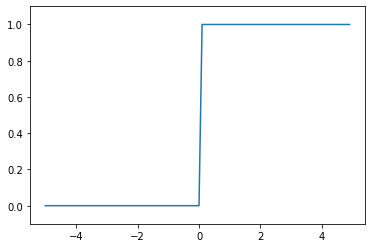

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

- 인수 $x$가 넘파이 배열이어도 올바른 결과가 나온다.

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 시그모이드 함수를 그래프로 그려보자.

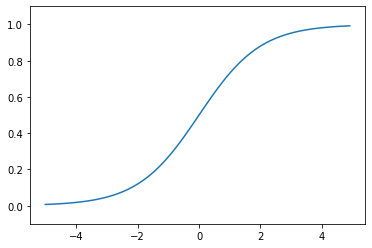

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드는 S자 모양

### 3.2.5 시그모이드 함수와 계단 함수 비교

- 시그모이드
 - 부드러운 곡선  
 - 입력에 따라 출력이 연속적으로 변화  
 - 실수를 리턴

- 계단 함수
 - 0을 경계로 출력이 갑자기 변화  
 - 0과 1 중 하나의 값만 리턴

- 시그모이드 함수의 '매끈함'이 신경망 학습에서 아주 중요한 역할

### 3.2.6 비선형 함수

- 선형 함수
 - $f(x)=ax+b$
 - 출력이 입력의 상수배만큼 변하는 함수
 - 그래프는 곧은 1개의 직선

- 비선형 함수
 - 선형이 아닌 함수
 - 직선 1개로는 그릴 수 없는 함수
 - 시그모이드 함수와 계단 함수는 모두 비선형 함수

- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.  
 = 선형 함수를 사용해서는 안 된다.
  ∵ 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없다.

- 선형 함수의 문제  
 = 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.  
 = 층을 쌓는 혜택을 얻을 수 없다.

### 3.2.7 ReLU 함수

- Rectified Linear Unit, 렐루
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수
- $h(x) = x(x>0)$ or $h(x) = 0(x\leq0)$

In [ ]:
def relu(x):
    return np.maximum(0, x)

- 책 후반부에서는 주로 ReLU 함수를 사용한다.

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

- 2차원 배열은 특히 행렬matrix이라고 부르고, 배열의 가로 방향을 행row, 세로 방향을 열column이라고 한다.

### 3.3.2 행렬의 곱

- 행렬의 곱에서는 대응하는 차원의 원소 수가 같아야 한다.
- $3*2$ 행렬 A와 $2*4$ 행렬 B를 곱해 $3*4$ 행렬 C를 만들 때, 행렬 C의 형상은 행렬 A의 행 수와 행렬 B의 열 수가 된다.
- A가 2차원 행렬이고 B가 1차원 배열일 때도 대응하는 차원의 원소 수를 일치시킨다.

### 3.3.3 신경망에서의 행렬 곱

In [27]:
>>> X = np.array([1, 2])
>>> X.shape

(2,)

In [28]:
>>> W = np.array([[1,3,5], [2,4,6]])
>>> print(W)

[[1 3 5]
 [2 4 6]]


In [29]:
>>> W.shape

(2, 3)

In [30]:
>>> Y = np.dot(X, W)
>>> print(Y)

[ 5 11 17]


- 행렬의 곱으로 한꺼번에 계산해주는 기능(np.dot(X,W))은 신경망을 구현할 때 매우 중요하다.

## 3.4 3층 신경망 구현하기

- 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

### 3.4.1 표기법 설명

### 3.4.2 각 층의 신호 전달 구현하기

### 3.4.3 구현 정리

## 3.5 출력층 설계하기

- 신경망은 분류와 회귀 모두에 이용할 수 있다.
 - 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수는 다르다.
 - 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.
- 기계학습 문제는 분류classification와 회귀regression로 나뉜다.
 - 분류: 데이터가 어느 클래스에 속하느냐는 문제 ex. 사진 속 인물의 성별 분류
 - 회귀: 입력 데이터에서 (연속적인) 수치를 예측하는 문제 ex. 사진 속 인물의 몸무게를 예측하는 문제 

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.

- 항등 함수identity function: $σ()$
 - 입력을 그대로 출력
 - 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.

- 소프트맥스 함수softmax function: $y_k= \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
 - $exp(x)$는 $e^x$을 뜻하는 지수 함수exponential function($e$는 자연상수)
 - $n$은 출력층의 뉴런 수
 - $y_k$는 그중 k번째 출력임을 의미
 - 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.
 - 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받는다.

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

- 컴퓨터는 수를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다루므로 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없는 문제가 발생하며, 이를 오버플로overflow라 한다.
- 소프트맥스 함수에서 사용하는 지수 함수는 쉽게 아주 큰 값을 리턴하므로, 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다.
- 이 문제를 해결하도록 소프트맥스 함수 구현을 개선해 보자.
>  
$y_k= \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
 $=\frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)}$
 $=\frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)}$
 $=\frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}$  

 > 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음을 알 수 있다.  

 > $C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

 > 이를 활용하여 위에서 구현한 소프트맥스 함수를 다음과 같이 개선할 수 있다. (입력 신호 중 최댓값을 뺌)

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수
- 소프트맥스 함수 출력의 총합은 1 -> 소프트맥스 함수의 출력은 확률로 해석할 수 있다.
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.  
 ∵지수 함수 $y=exp(x)$가 단조 증가 함수
 - 단조 증가 함수란? 정의역 원소 a, b가 $a\leq b$일 때, $f(a)\leq f(b)$가 성립하는 함수

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하고, 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않기 때문에, 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.

- 기계학습의 문제 풀이는 학습과 추론inference의 두 단계를 거쳐 이뤄진다. 학습 단계에서 모델을 학습하고, 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해 추론을 수행한다. <u>추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적</u>인 반면, 신경망을 <u>학습시킬 때는 출력층에서 소프트맥스 함수를 사용</u>한다.



### 3.5.4 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 풀려는 문제에 맞게 정한다.
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적  
 ex) 입력 이미지를 0부터 9 중 하나로 분류하는 문제라면, 출력층의 뉴런을 10개로 설정

## 3.6 손글씨 숫자 인식

- 머신러닝과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다.
 1.   학습: 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습 
 2.   추론: 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류

### 3.6.1 MNIST 데이터셋

In [9]:
# 바로 찾을 수 있도록 dataset폴더를 코랩 노트북 저장경로인 구글드라이브에 업로드했다
# 따라서 부모 경로를 찾는 sys, os import와 pardir 함수 코딩을 생략했다
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [10]:
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

In [26]:
# 아래에서 open하는 sample_weight.pkl 파일 업로드
# from google.colab import files 
# file_uploaded = files.upload()

# 피클 임포트
import pickle

# 3.5.2에서 만든 softmax 함수 재사용
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

- 배치 처리는 컴퓨터 계산 시 큰 이점이 있다.  
 1) 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있다.  
 2) 커다란 신경망에서는 데이터 전송이 병복으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄인다.(느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐)

 > 배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다.

## 3.7 정리

- 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 퍼셉트론과 같다.
- BUT 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있다.
 - 신경망에서는 매끄럽게 변화하는 시그모이드 함수를 활성화 함수로 사용  
 - 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용